<h2 align="center" style="color:blue">Data Cleaning & Exploratory Data Analysis</h2>

In [1]:
# Import necessary libraries
from imports import *

<h2 align="center"> Data Preparation </h2>

In [2]:
# Import the datasets
df_customers = pd.read_csv("../data/raw/customers.csv")
df_loans = pd.read_csv("../data/raw/loans.csv")
df_bureau = pd.read_csv("../data/raw/bureau_data.csv")

In [3]:
# verifying the shape of datasets
print("Number of rows and columns in customers data: ", df_customers.shape)
print("Number of rows and columns in loans data: ", df_loans.shape)
print("Number of rows and columns in bureau data: ", df_bureau.shape)

Number of rows and columns in customers data:  (50000, 12)
Number of rows and columns in loans data:  (50000, 15)
Number of rows and columns in bureau data:  (50000, 8)


In [4]:
# display the first few rows
print("First few rows of the customers dataset:")
df_customers.head(2)

First few rows of the customers dataset:


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001


In [5]:
# display the first few rows
print("First few rows of the loans dataset:")
df_loans.head(2)

First few rows of the loans dataset:


,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


In [6]:
# display the first few rows
print("First few rows of the bureau dataset:")
df_bureau.head(2)

First few rows of the bureau dataset:


,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4


In [7]:
# merging the datasets into a single data frame

df = pd.merge(df_customers, df_loans, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [8]:
# saving the customers and loans merged data for future reference
df.to_parquet('../data/processed/merged_cust_loan_data.parquet', index=False)
print("Processed data saved to ../data/processed/merged_cust_loan_data.parquet")

Processed data saved to ../data/processed/merged_cust_loan_data.parquet


In [9]:
# merging the previous combined dataset with bureau data into a single data frame
df = pd.merge(df, df_bureau)
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [10]:
# saving the customers and loans merged data for future reference
df.to_parquet('../data/processed/final_merged_data.parquet', index=False)
print("Processed data saved to ../data/processed/final_merged_data.parquet")

Processed data saved to ../data/processed/final_merged_data.parquet


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [12]:
# Convert 'default' from boolean to integer
df['default'] = df['default'].astype(int)

# Check class distribution
df.default.value_counts()

0    45703
1     4297
Name: default, dtype: int64

## Train–Test Split (Preventing Data Leakage)

To prevent data leakage, the dataset is split into training and testing sets **before any preprocessing**, feature engineering, scaling, or model training.

- `X` contains all features except the target (`default`)
- `y` contains the target variable
- We use `stratify=y` to preserve the original class distribution (important due to class imbalance)
- We store the results in `df_train` and `df_test` for clean downstream processing

This ensures that:
- The model only learns from training data  
- The test set remains completely unseen  
- All preprocessing steps can be fitted **only on training data** and applied later to test data

In [13]:
# Separate features and target
X = df.drop("default", axis="columns")
y = df['default']

# Stratified split to maintain class imbalance ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [14]:
# Combine features + target for convenience
df_train = pd.concat([X_train, y_train], axis="columns")
df_test = pd.concat([X_test, y_test], axis="columns")

In [15]:
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

### ✔ Summary

- Training set size: 37,500 rows  
- Test set size: 12,500 rows  
- Stratified split ensures the class ratio in train and test matches the original dataset  
- No preprocessing has been done yet → the split is leak-free  
- `df_train` will be used for:
  - EDA  
  - Cleaning  
  - Imputation  
  - Encoding  
  - Scaling  
  - Feature engineering

- `df_test` will be used **only once** at the end for final model evaluation.

In [16]:
# saving the training and testing data for future reference
df_train.to_parquet('../data/processed/training_data.parquet', index=False)
print("Processed data saved to ../data/processed/training_data.parquet")

# saving the training and testing data for future reference
df_test.to_parquet('../data/processed/testing_data.parquet', index=False)
print("Processed data saved to ../data/processed/testing_data.parquet")

Processed data saved to ../data/processed/training_data.parquet
Processed data saved to ../data/processed/testing_data.parquet


## Data Cleaning

### Handling Missing Values

In [17]:
# Check the number of missing values in each column
print("Missing values in the dataset:")
print(df_train.isna().sum())

Missing values in the dataset:
cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months

There are 47 missing values in the residence_type feature.

Since this feature is categorical, the most practical and consistent approach is mode imputation, replacing missing values with the most frequently occurring category.

In [18]:
# Inspect unique values in the residence_type column
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [19]:
# Compute the mode of residence_type (most frequent category)
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [20]:
# Fill missing values in the training set with the mode
df_train.residence_type.fillna(mode_residence, inplace=True)

# Verify unique values after imputation
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [21]:
# Apply the same imputation strategy to the test set
df_test.residence_type.fillna(mode_residence, inplace=True)

### Checking for Duplicate Records

In [22]:
# Check for any duplicate values in the dataset and handle them appropriately
print("Duplicate values in the dataset:")
print(df_train.duplicated().sum())

Duplicate values in the dataset:
0


No duplicate rows were found in the dataset.
If any duplicates had been detected, they would have been removed using df.drop_duplicates(inplace=True) to ensure data integrity and avoid double-counting during analysis.

In [23]:
# if duplicate values are found:
df_train.drop_duplicates(inplace=True)
print("Duplicate values in the dataset:")
print(df_train.duplicated().sum())

Duplicate values in the dataset:
0


In [24]:
# we will be applying the same imputation strategy to the test set
# if duplicate values are found:
df_test.drop_duplicates(inplace=True)
print("Duplicate values in the dataset:")
print(df_test.duplicated().sum())

Duplicate values in the dataset:
0


### Outlier Detection

In [25]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
count,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,...,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00
mean,39.54,2633326.16,1.94,16.00,418866.25,4699691.57,3996067.73,80290.68,719292.19,3196854.19,...,1333819.51,986298.87,2.50,1.00,76.11,4.84,26.67,5.01,43.42,0.09
std,9.86,2623780.52,1.54,8.92,169035.02,6257832.98,5371862.29,113128.14,966935.21,4297489.83,...,1213674.44,1043145.01,1.12,0.81,43.77,5.84,32.78,2.03,29.39,0.28
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,33.00,802000.00,0.00,8.00,302001.00,1142000.00,961000.00,19220.00,172980.00,768800.00,...,422197.50,287040.25,1.00,0.00,42.00,0.00,0.00,4.00,18.00,0.00
50%,39.00,1885000.00,2.00,16.00,400001.00,2644000.00,2230000.00,44600.00,401400.00,1784000.00,...,997427.50,665014.50,3.00,1.00,71.00,3.00,13.00,5.00,39.00,0.00
75%,46.00,3326250.00,3.00,24.00,560001.00,5178000.00,4619000.00,92420.00,831420.00,3695200.00,...,1784879.00,1234062.75,4.00,2.00,107.00,8.00,46.00,6.00,67.00,0.00
max,70.00,11999000.00,5.00,31.00,700001.00,52175000.00,47819000.00,5293543.52,8607420.00,38255200.00,...,5000000.00,7846643.00,4.00,2.00,223.00,24.00,171.00,9.00,99.00,1.00


In [26]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [27]:
# Extract numeric columns
numeric_columns = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

In [28]:
# Extract all categorical columns
categorical_columns = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

### Box plot to visualize outliers

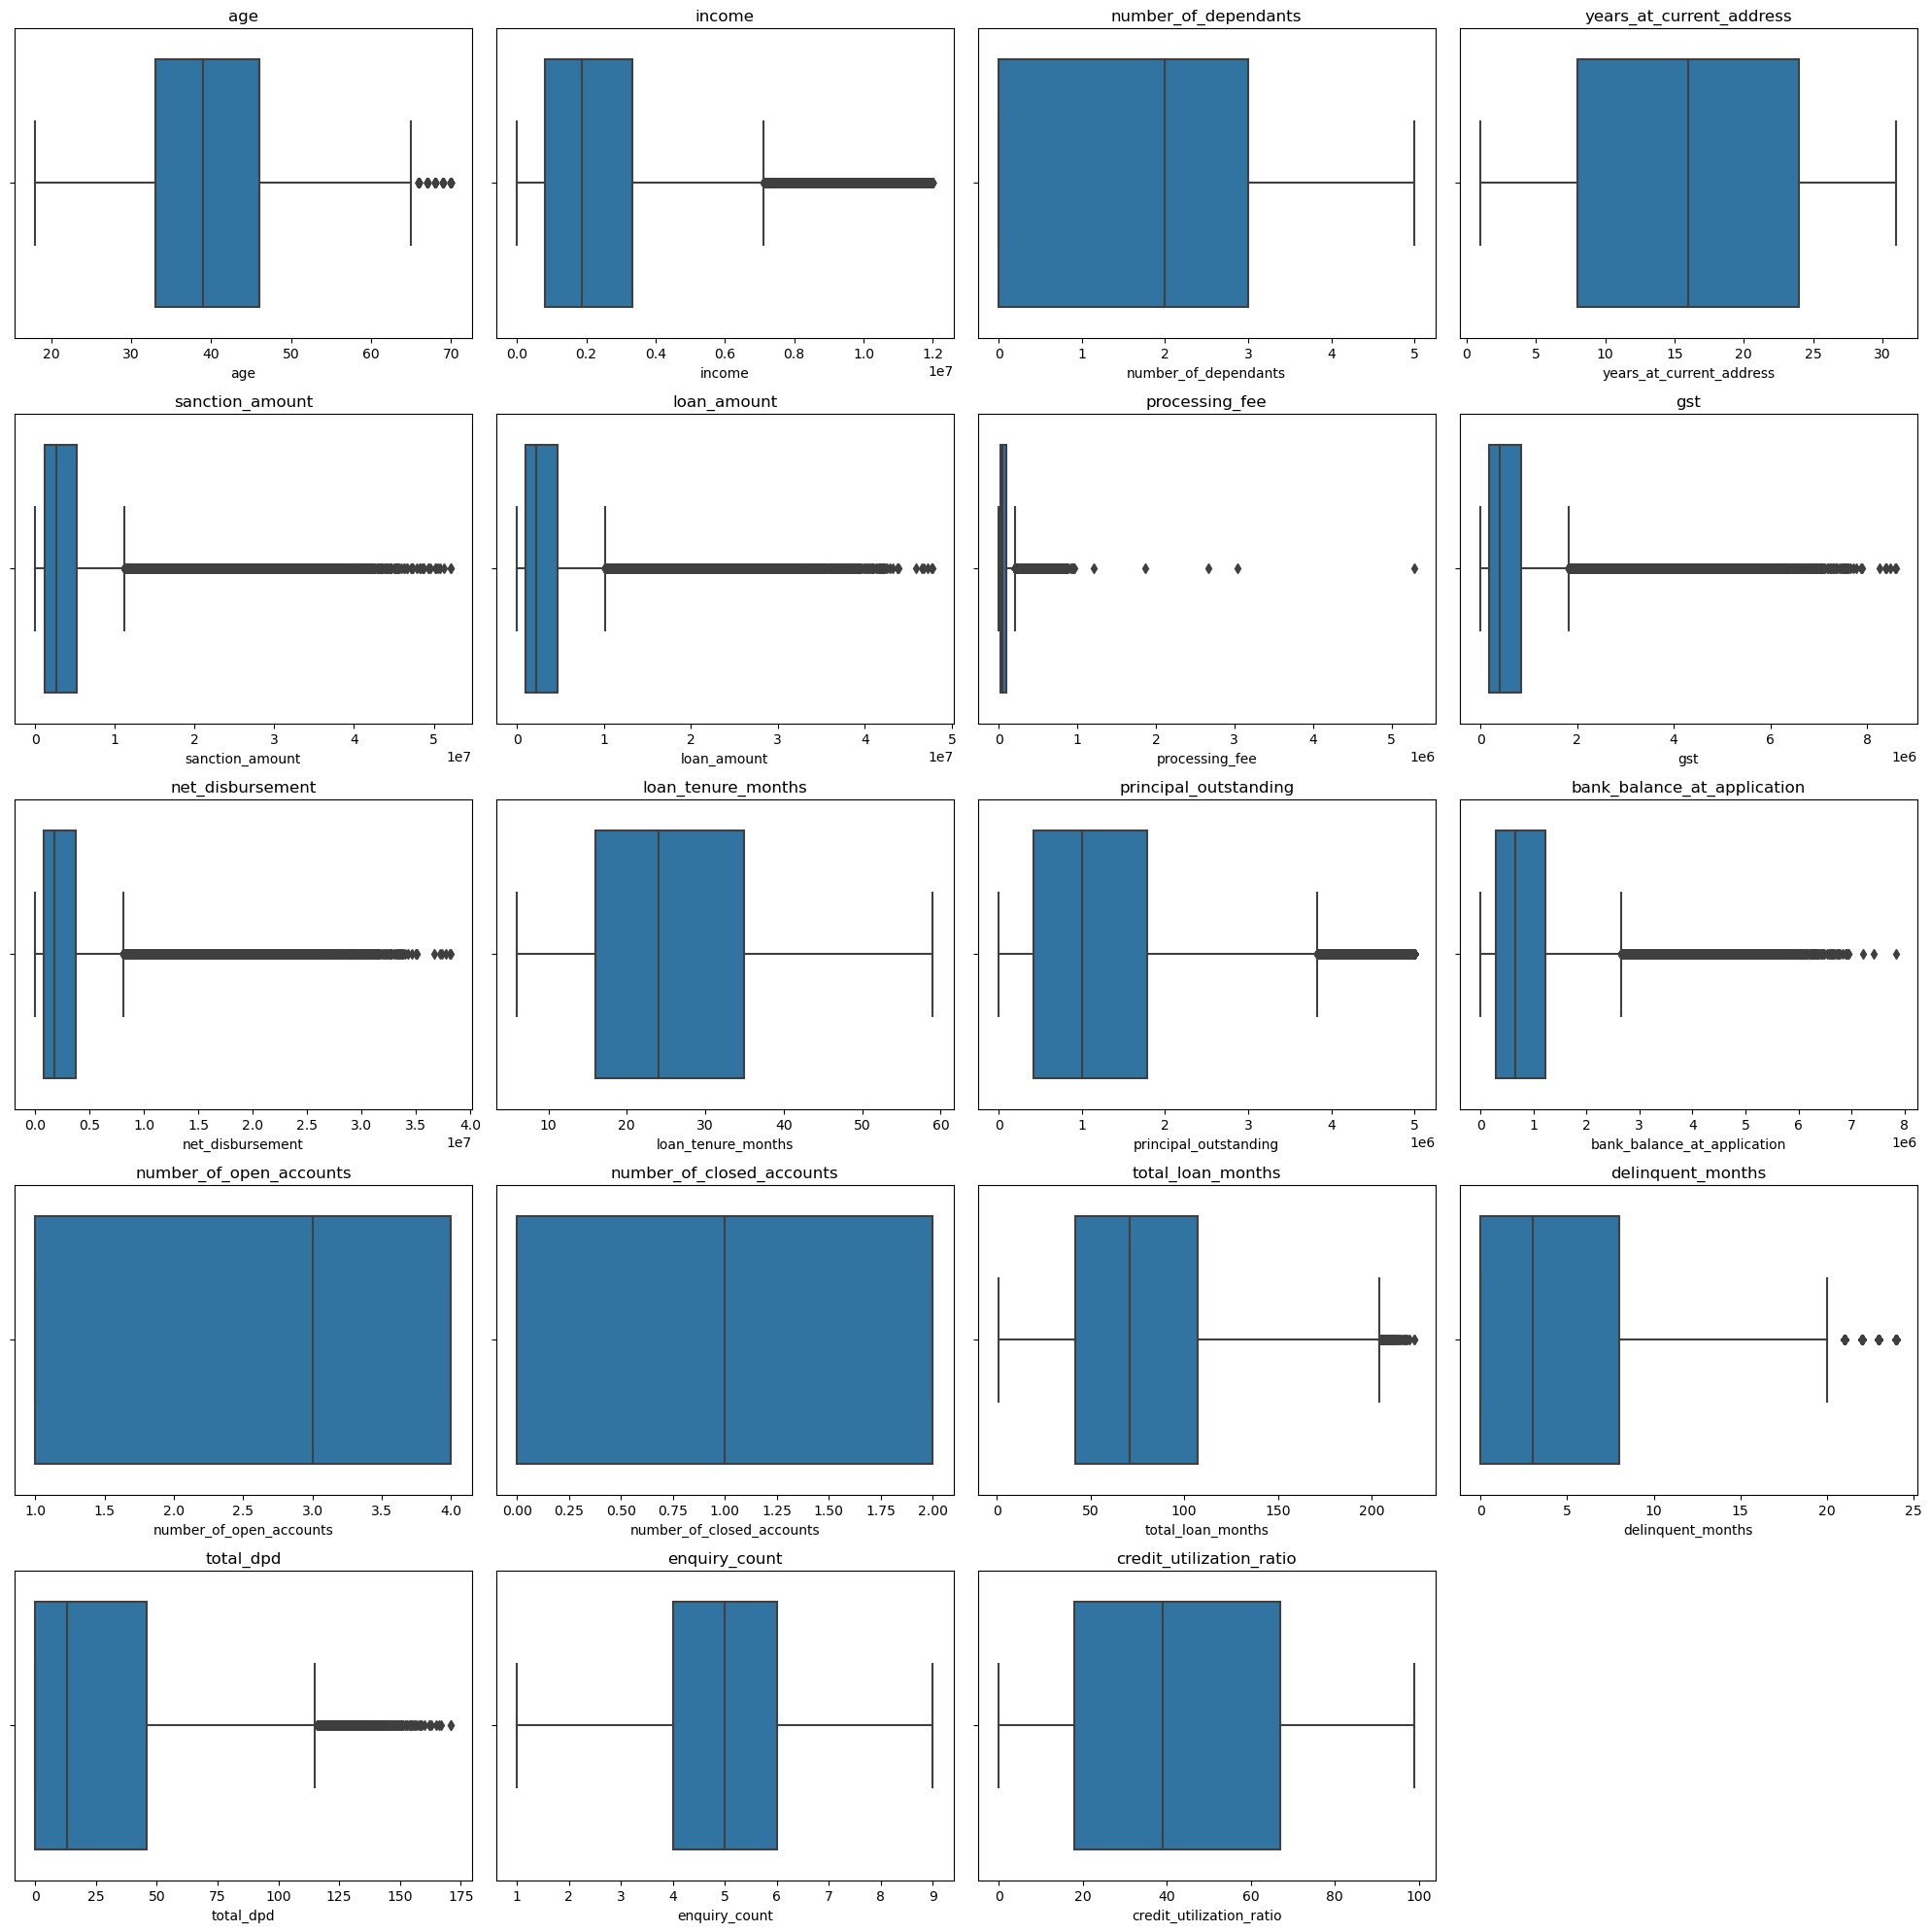

In [29]:
# Visualize outliers for all numeric columns using boxplots
cols = 4  # 4 plots per row
rows = (len(numeric_columns) + cols - 1) // cols  # Calculate needed rows

plt.figure(figsize=(20, rows * 4))  # Adjust height based on number of rows

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df_train[col])
    plt.title(col)

plt.tight_layout()
plt.savefig("../outputs/figures/numeric_boxplots_grid.png", dpi=300)
plt.show()

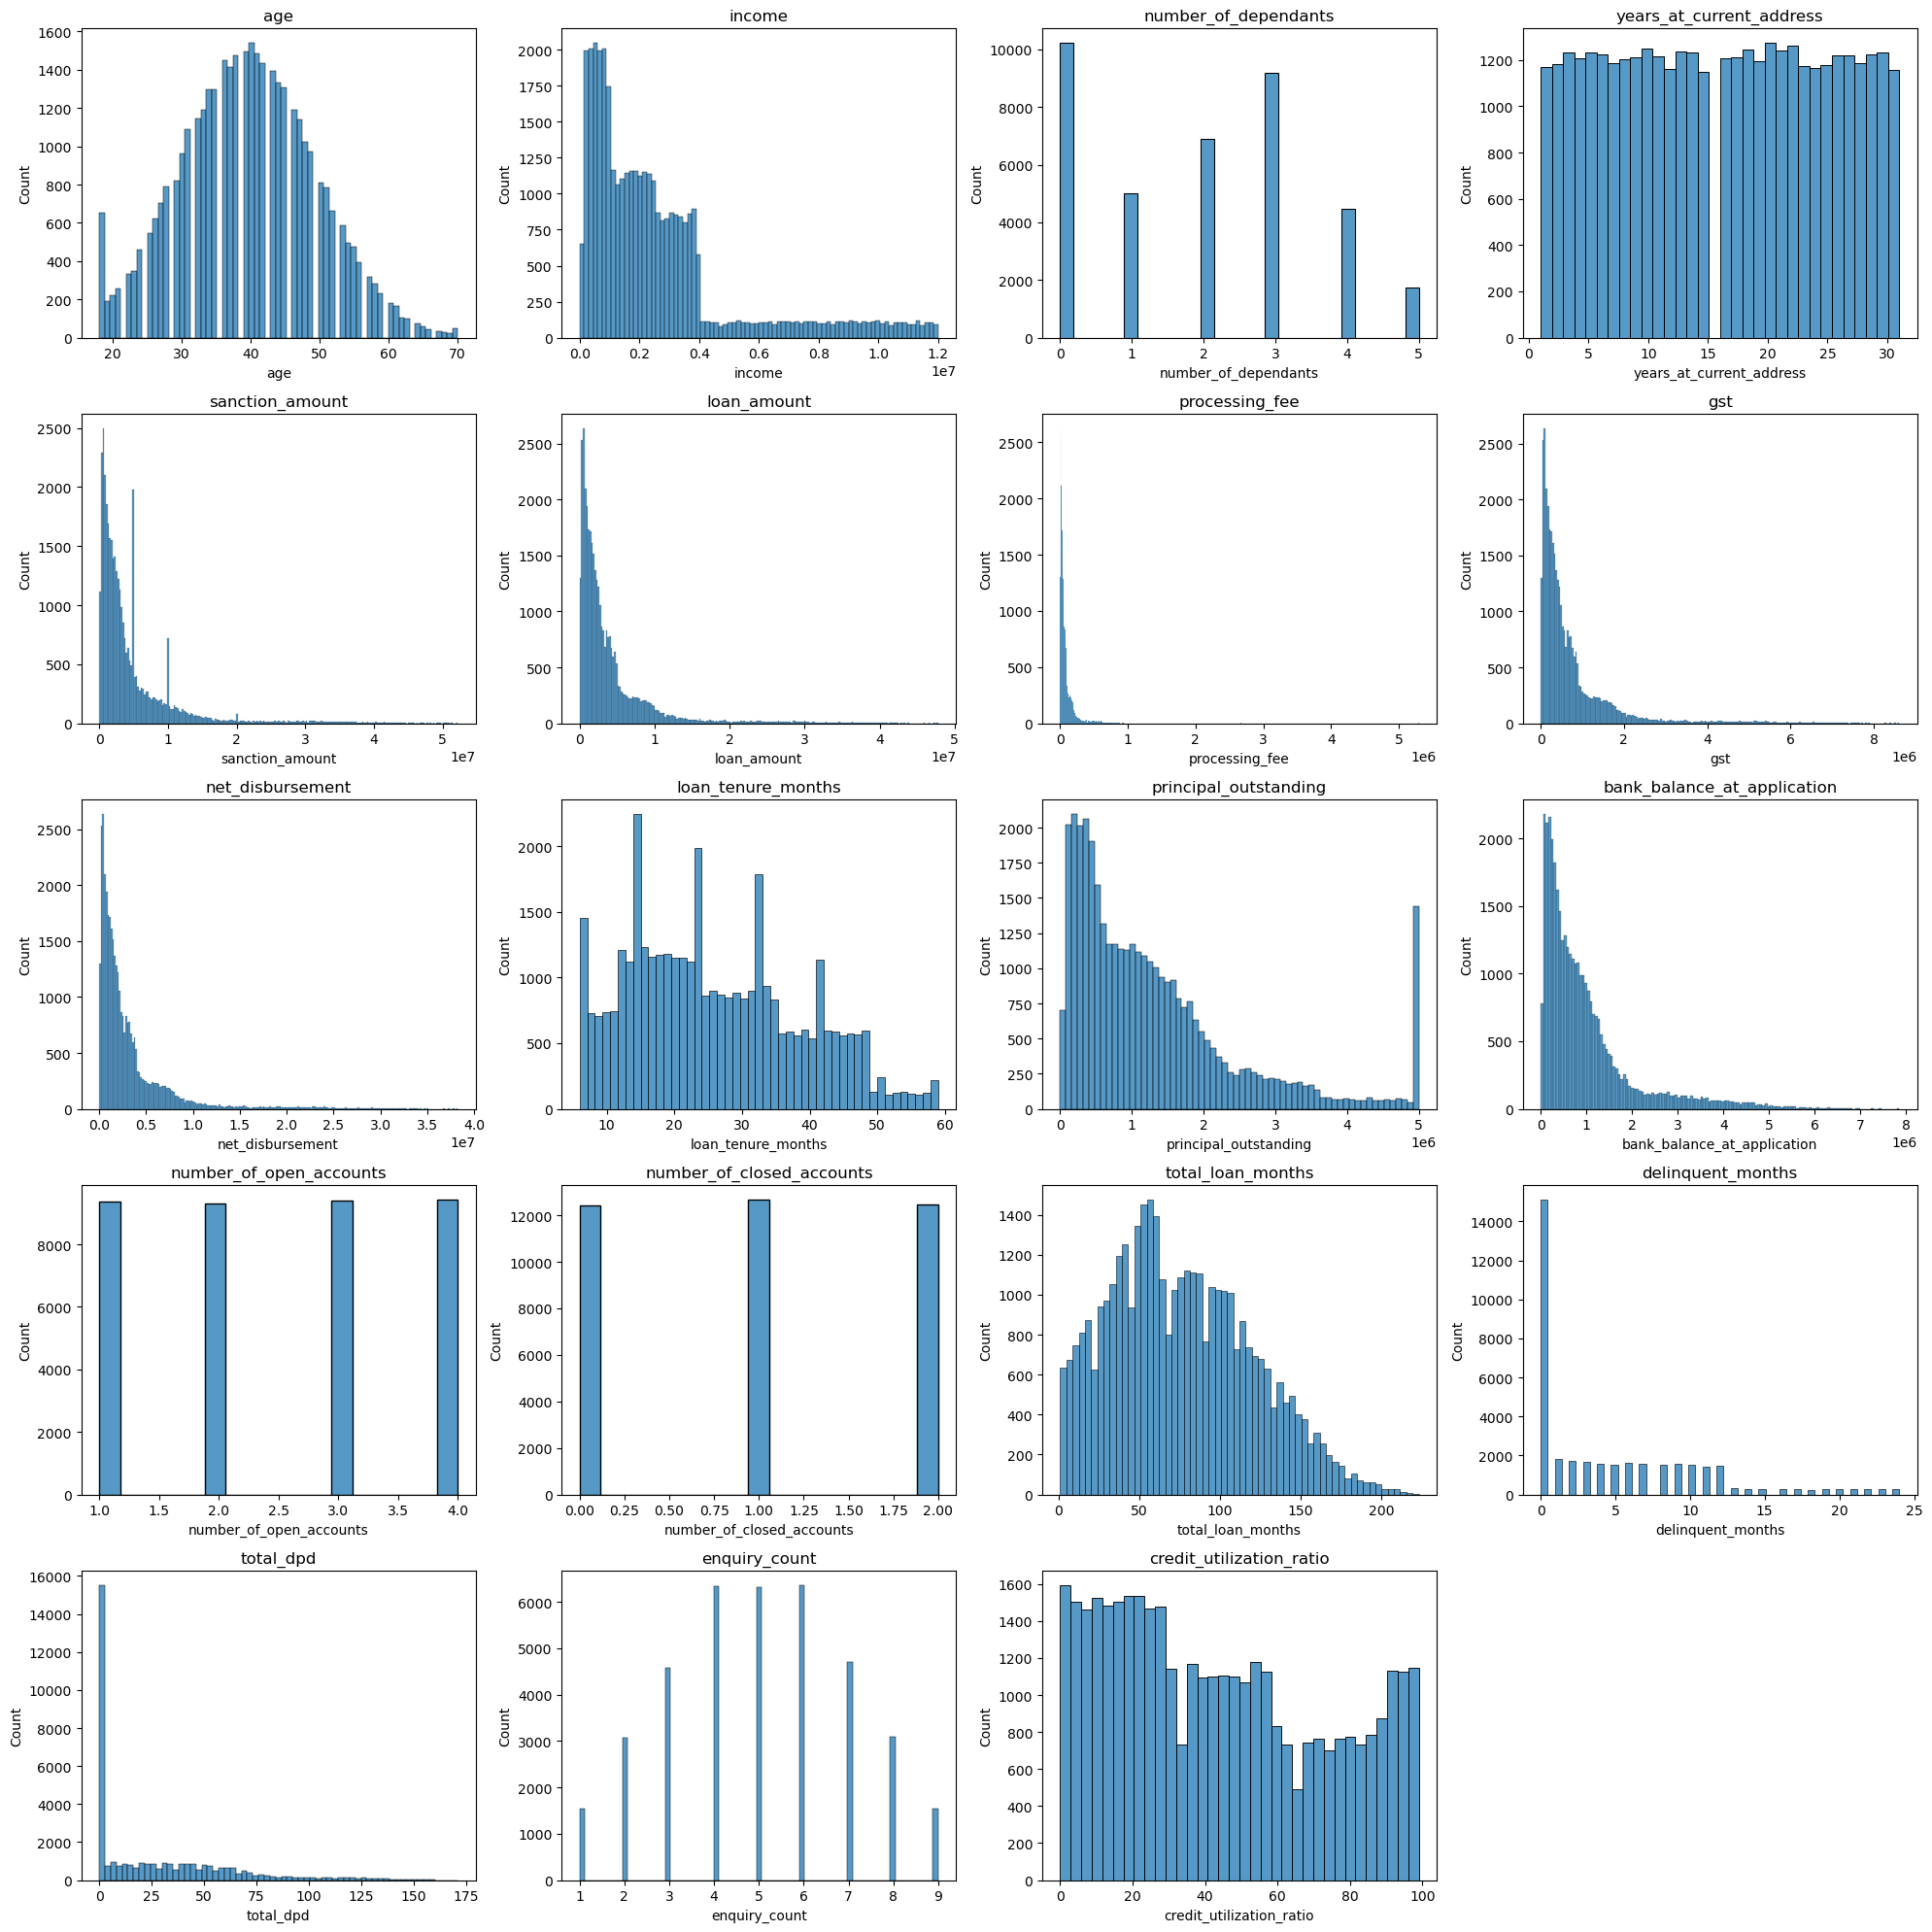

In [30]:
# Visualize outliers for all numeric columns using boxplots
cols = 4  # 4 plots per row
rows = (len(numeric_columns) + cols - 1) // cols  # Calculate needed rows

plt.figure(figsize=(20, rows * 4))  # Adjust height based on number of rows

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(x=df_train[col])
    plt.title(col)

plt.tight_layout()
plt.savefig("../outputs/figures/numeric_histograms_grid.png", dpi=300)
plt.show()


### 📊 **Distribution & Outlier Analysis of Numeric Features**

To understand the structure of the numeric variables, I visualized each feature using **boxplots** and **histograms**. This helps identify skewness, natural variability, and potential errors in the dataset.

---

#### **1. Not all extreme values are outliers**

Some variables showed high-value points, but domain understanding tells us they are perfectly valid:

* **Age:**
  Values around 70+ appear as outliers visually, but age 70 is normal and should remain.

* **Income:**
  Some records show incomes above **₹1 crore (10 million)**. Although visually far from the median, high incomes are common for certain professions and customer segments. These are **high but valid**, not outliers.

This highlights an important point:

       Visual outliers ≠ true outliers
Domain knowledge must drive cleanup decisions.

---

#### **Several numeric financial variables are right-skewed**

Variables like `income`, `sanction_amount`, `loan_amount`, `processing_fee`, and `bank_balance_at_application` show long right tails.
This is typical for financial datasets where:

* most customers take moderate loans
* a small segment takes very large loans
* incomes vary widely

Right-skewness is expected and not an error.

### Outlier Removal: Processing Fee

In [31]:
df_train.processing_fee.describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

One variable that potentially showed invalid values was processing_fee.

**Initial observation**
- The max processing fee was 52.9 lakh, which is unusually high.
- A processing fee higher than the loan amount is impossible.

This clearly points to data entry errors.

In [32]:
df_train[df_train.processing_fee==df_train.processing_fee.max()][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee
9898,3626000,5293543.52


In [33]:
df_train[df_train.processing_fee > df_train.loan_amount][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


**Business rule (given by domain team)**
- Processing fee should not exceed 3% of loan amount.

In [34]:
# Identify unrealistic processing fee values using business rule:
# Business team confirmed that processing fee should NOT exceed 3% of loan amount.
df_train[(df_train.processing_fee/df_train.loan_amount) > 0.03][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


- Using this rule, the above 5 records were identified as invalid.
- These processing fee values exceed 100% of loan amount in multiple cases, which is impossible.
- Since only 5 records violate this business rule, we removed them entirely.
- This avoids distortion of model trainig.

In [35]:
# saving the training and testing data for future reference
df_train.to_parquet('../data/processed/training_data.parquet', index=False)
print("Processed data saved to ../data/processed/training_data.parquet")

# saving the training and testing data for future reference
df_test.to_parquet('../data/processed/testing_data.parquet', index=False)
print("Processed data saved to ../data/processed/testing_data.parquet")

Processed data saved to ../data/processed/training_data.parquet
Processed data saved to ../data/processed/testing_data.parquet


In [36]:
# Remove the identified outliers from training data
df_train_1 = df_train[(df_train.processing_fee/df_train.loan_amount) < 0.03].copy()

In [37]:
# Verifying the outliers
df_train_1[(df_train_1.processing_fee/df_train_1.loan_amount) > 0.03][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee


In [38]:
df_train_1.shape

(37488, 33)

To maintain consistency and avoid leakage, the same filtering logic was applied to the test data.

In [39]:
df_test.residence_type.isna().sum()

0

In [40]:
# Apply the same rule to test data to avoid data leakage and maintain consistency
df_test_1 = df_test[(df_test.processing_fee/df_test.loan_amount) < 0.03].copy()

# Verifying if the rule has applied
df_test_1.shape

(12497, 33)

### Outlier Validation Using Business Rules (GST & Net Disbursement)

In [41]:
# Use other business rules for data validation
# Rule 1: GST should not be more than 20%

df_train_1[(df_train_1.gst/df_train_1.loan_amount)>0.2].shape

(0, 33)

In [42]:
# Rule 2: Net disbursement should not be higher than loan_amount
df_train_1[df_train_1.net_disbursement>df_train_1.loan_amount].shape

(0, 33)

Based on the business rules provided, no records were found where GST exceeded 20% of the loan amount or where net disbursement was greater than the loan amount.

### Analyze Categorical Columns

In [43]:
categorical_columns

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [44]:
for col in categorical_columns:
    print(col, "--->",df_train_1[col].unique())

gender ---> ['M' 'F']
marital_status ---> ['Married' 'Single']
employment_status ---> ['Self-Employed' 'Salaried']
residence_type ---> ['Owned' 'Mortgage' 'Rented']
city ---> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state ---> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode ---> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose ---> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type ---> ['Secured' 'Unsecured']
default ---> [0 1]


In [45]:
dump(categorical_columns, "../outputs/models/categorical_columns.pkl")

print("categorical_columns saved successfully.")

categorical_columns saved successfully.


### Fix Errors in Loan Purpose Column

In [46]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_train_1.loan_purpose.unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [47]:
# Apply the same rule to test data to avoid data leakage and maintain consistency
df_test_1['loan_purpose'] = df_test_1['loan_purpose'].replace('Personaal', 'Personal')
df_test_1['loan_purpose'].unique()

array(['Home', 'Education', 'Auto', 'Personal'], dtype=object)

In [48]:
df_train_1.to_parquet("../data/processed/processed_train_1.parquet", index=False)
print("Processed data saved to ../data/processed/processed_train_1.parquet")

df_test_1.to_parquet("../data/processed/processed_test_1.parquet", index=False)
print("Processed data saved to ../data/processed/processed_test_1.parquet")

Processed data saved to ../data/processed/processed_train_1.parquet
Processed data saved to ../data/processed/processed_test_1.parquet


<h2 align="center"> Exploratory Data Analysis </h2>

In [49]:
numeric_columns

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

### Age Column

In [50]:
df_train_1.groupby("default")['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,34265.00,39.77,9.88,18.00,33.00,40.00,46.00,70.00
1,3223.00,37.12,9.29,18.00,31.00,37.00,44.00,70.00


**Insights**

1. Average age in the default group is little less (37.12) than the average (39.7) of the group that did not default.
2. Variability (standard deviation) is mostly similar in both the groups
3. Both the groups have similar min and max ages

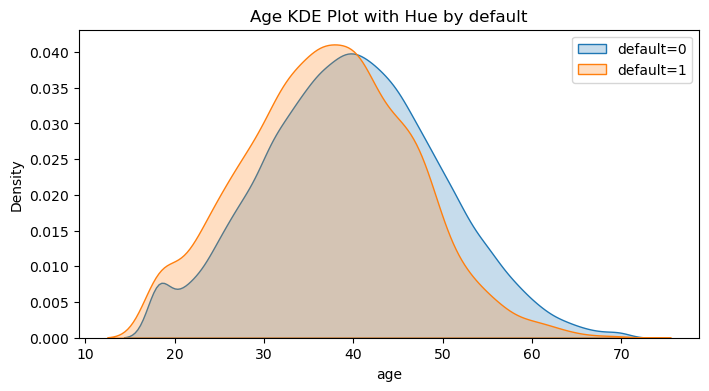

In [51]:
# Plot histogram for age with respect to target variable to examine data distribution and skewness

# Set figure size for better readability
plt.figure(figsize=(8, 4))

sns.kdeplot(df_train_1['age'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['age'][df_train_1['default'] == 1], fill=True, label='default=1')

plt.title(f"Age KDE Plot with Hue by default")

# Save figure for documentation and reproducibility
plt.savefig("../outputs/figures/age_kde_plot.png", dpi=300)

# Display the histogram
plt.legend()
plt.show()

**Insights**

- Orange (defaulted) group is slightly shifted to left indicating that people with young age are more likely to default on their loans

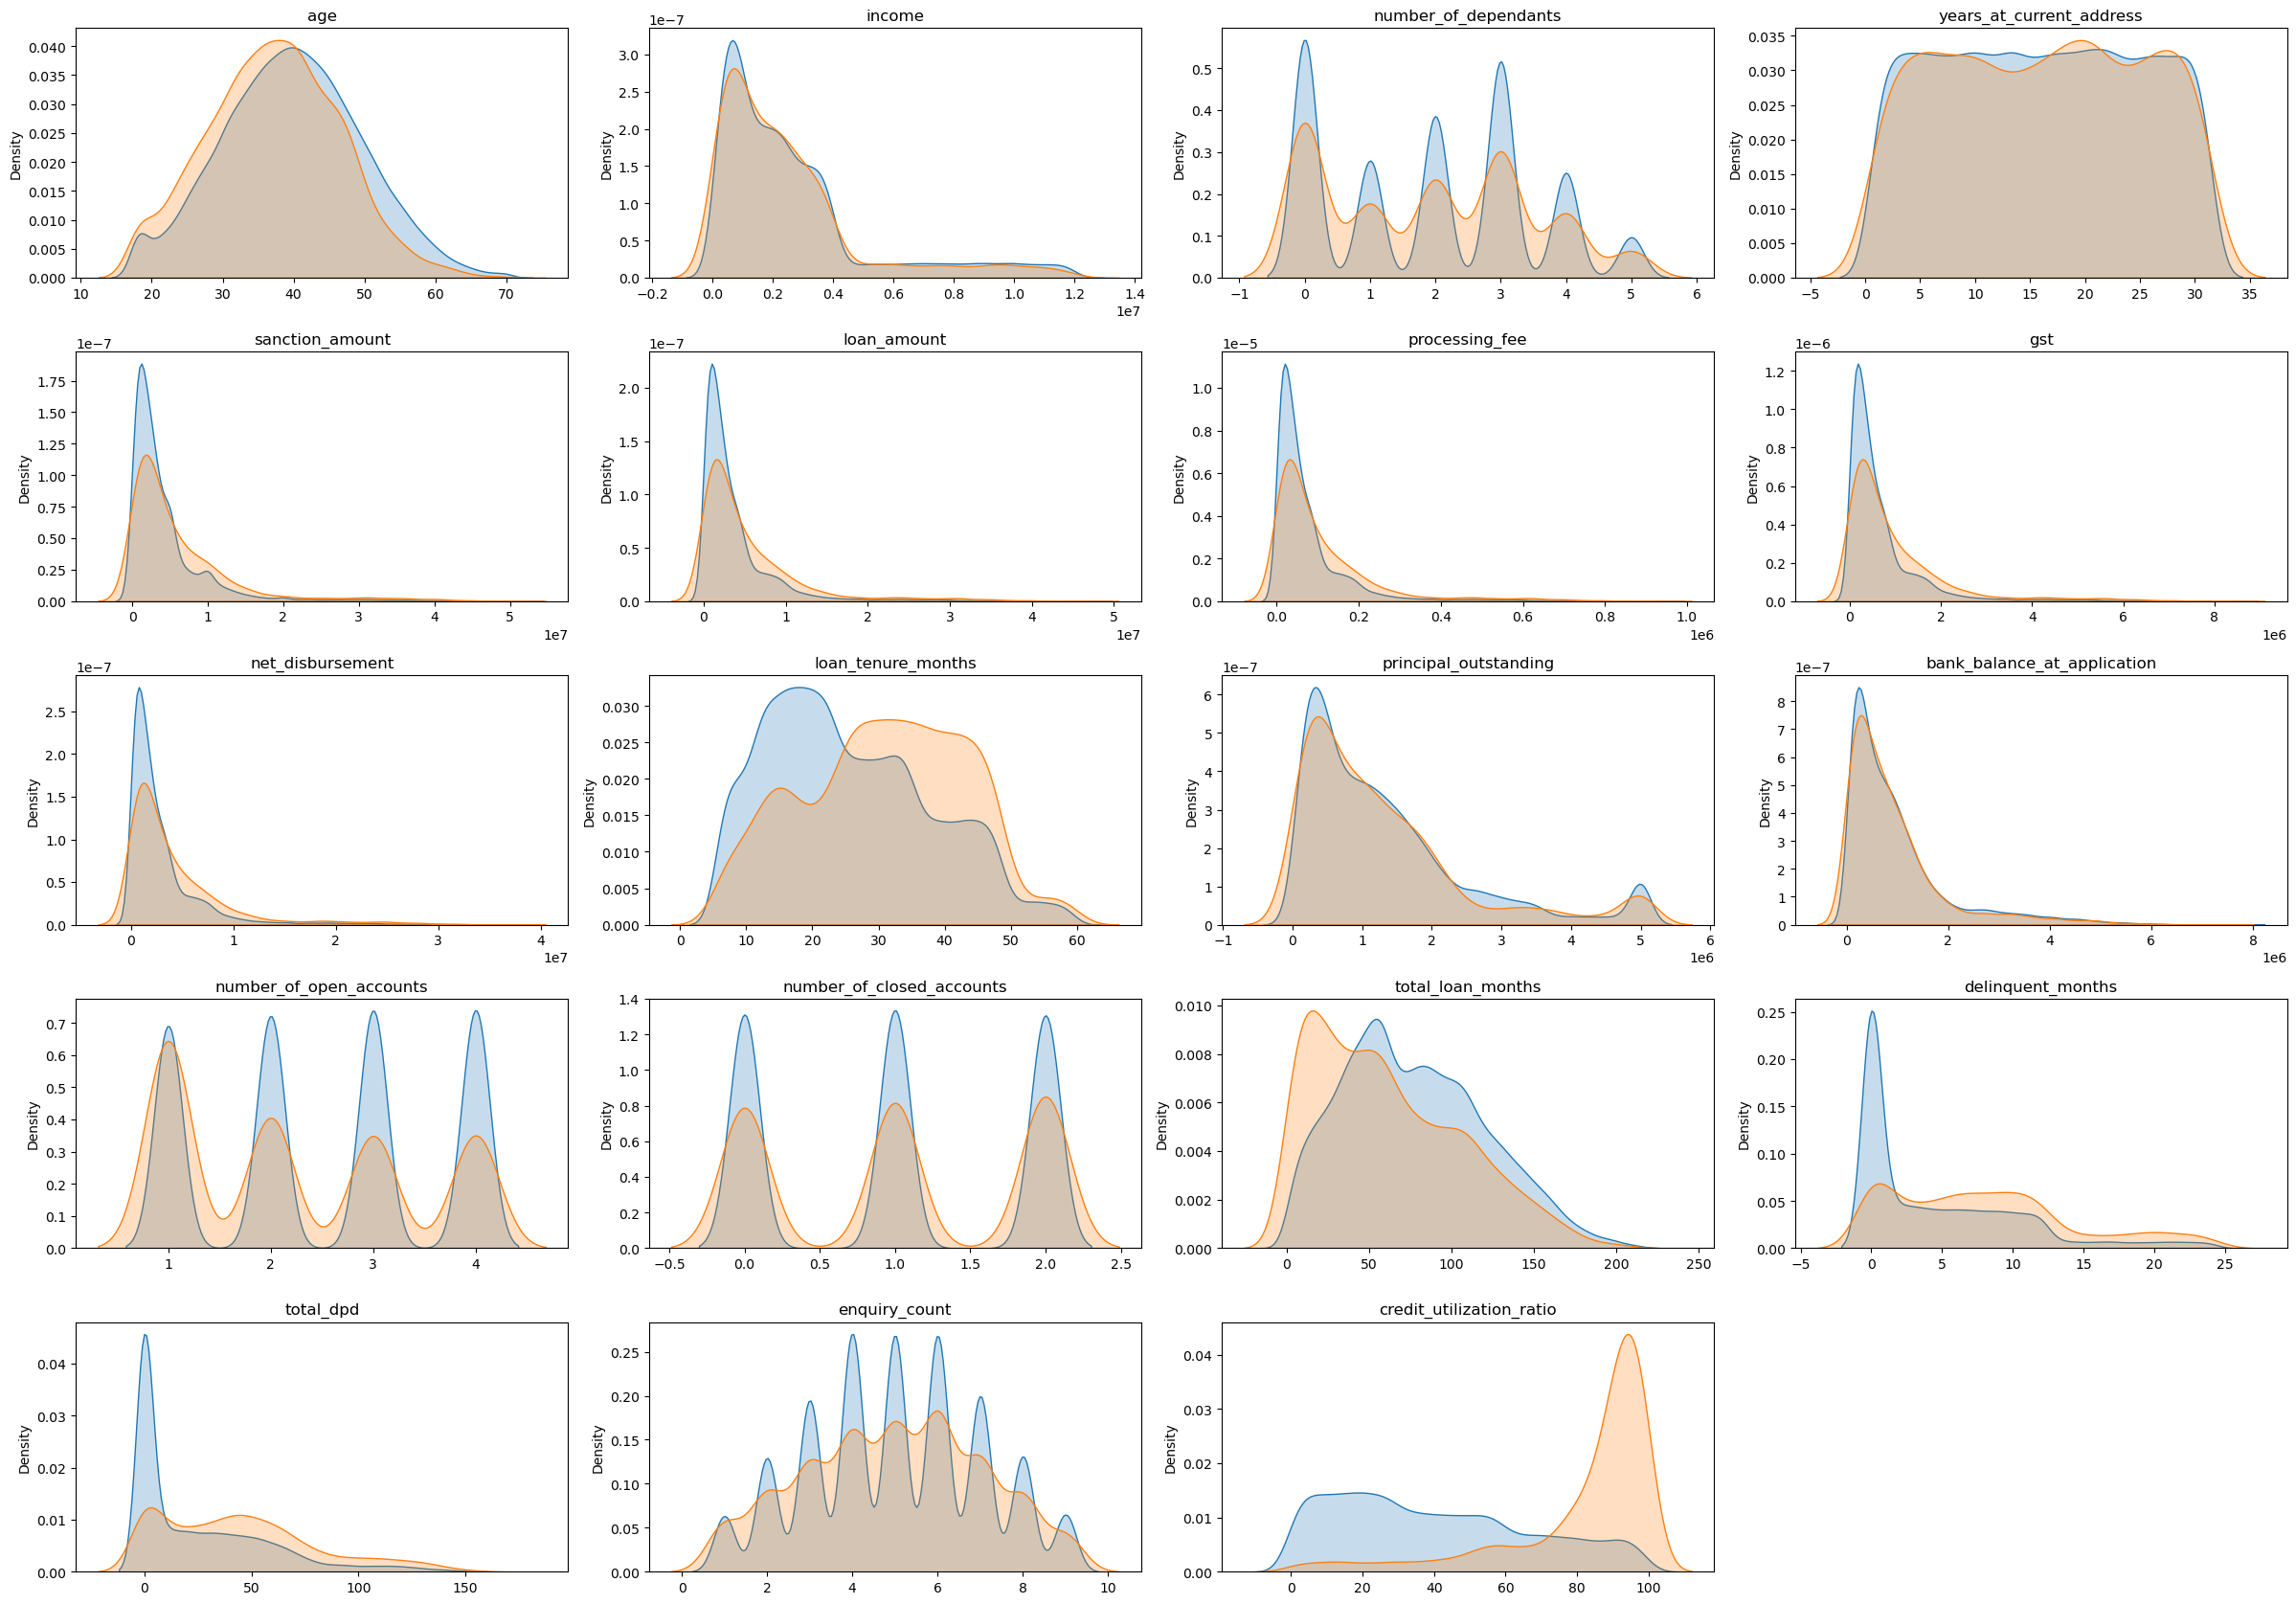

In [52]:
# Plot histogram for all numeric variables with respect to target variable to examine data distribution and skewness
plt.figure(figsize=(24, 20))  # Width, height in inches

for i, col in enumerate(numeric_columns):
    plt.subplot(6, 4, i+1)  # 1 row, 4 columns, ith subplot
    sns.kdeplot(df_train_1[col][df_train_1['default']==0], fill=True, label='default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1], fill=True, label='default=1')
    plt.title(col)        
    plt.xlabel('')
    
plt.tight_layout()
plt.savefig("../outputs/figures/Feature_Behaviour_Across_Default_Classes.png", dpi=300)
plt.show()

#### Insights:

- The KDE analysis highlights that variables — such as delinquent_months, DPD, credit utilisation ratio, enquiry count, loan_tenure_months — show the strongest separation between defaulters and non-defaulters.

- Higher values indicate high likelyhood of becoming a default. Hence these look like strong predictors.

- Meanwhile, loan size, income, and demographic characteristics show minimal separation.

- As observed loan_amount and income didnot give any signs of being strong predictors. May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. 

In [53]:
df_train_1.to_parquet("../data/processed/processed_train_1.parquet", index=False)
print("Processed data saved to ../data/processed/processed_train_1.parquet")

df_test_1.to_parquet("../data/processed/processed_test_1.parquet", index=False)
print("Processed data saved to ../data/processed/processed_test_1.parquet")

Processed data saved to ../data/processed/processed_train_1.parquet
Processed data saved to ../data/processed/processed_test_1.parquet


In [54]:
df_train_1.shape

(37488, 33)

In [55]:
df_test_1.shape

(12497, 33)

In [56]:
df_test_1.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
19205,C19206,36,M,Married,Self-Employed,3728000,3,Owned,24,Jaipur,...,2021-06-24,2021-07-23,2,1,42,0,0,5,98,0
15514,C15515,43,F,Single,Self-Employed,2493000,0,Owned,23,Delhi,...,2021-02-09,2021-02-18,4,0,125,0,0,5,32,0


In [57]:
df_train_1.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
